In [17]:
import retinanalysis as ra
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

## Search for datasets

In [18]:
exp_search = ra.get_datasets_from_protocol_names('objectmotion')
available_experiments = os.listdir(ra.ANALYSIS_DIR)
exp_search = exp_search.query('exp_name in @available_experiments').reset_index(drop = True)
display(exp_search)


Found 1 protocols matching "objectmotion":
['manookinlab.protocols.ObjectMotionDots']

Found 69 experiments, 116 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20250715C,data016,0.5,motion,manookinlab.protocols.ObjectMotionDots,1,20250715C\data016,OMS Dots 12 of 16,130,12,2353,3387,523
1,20250911C,data012,0.5,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20250911C\data012,OMS Dots,141,12,2445,3589,588
2,20250917C,data005,0.5,chunk2,manookinlab.protocols.ObjectMotionDots,1,20250917C\data005,OMS Dots,143,12,2461,3615,597
3,20250924C,data014,0.5,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20250924C\data014,OMS Dots,144,12,2487,3645,619
4,20251006C,data024,0.0,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20251006C\data024,ndf 0 oms dots,146,12,2520,3698,644
5,20251006C,data025,0.5,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20251006C\data025,ndf 0.5 oms dots,146,12,2521,3699,644
6,20251008C,data004,0.5,oms_dots,manookinlab.protocols.ObjectMotionDots,1,20251008C\data004,OMS Dots,149,12,2545,3730,670


## Plot Mosaics for all the Options

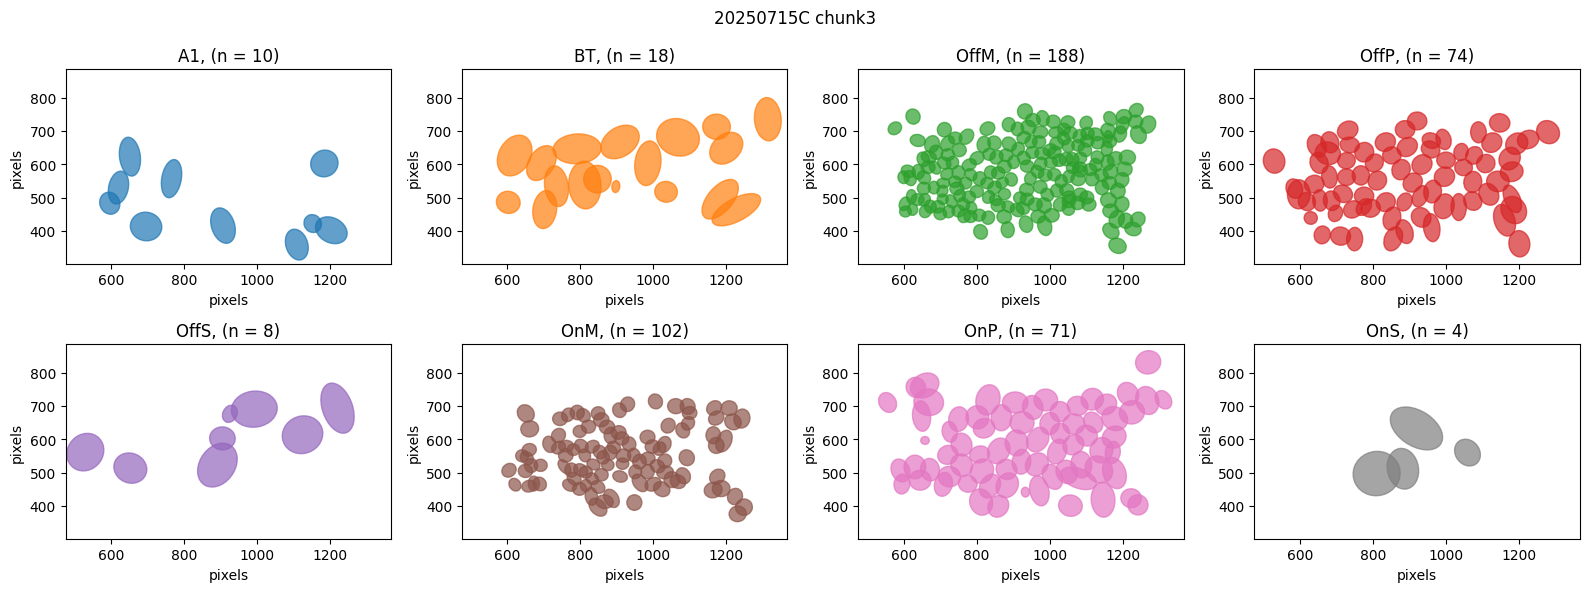

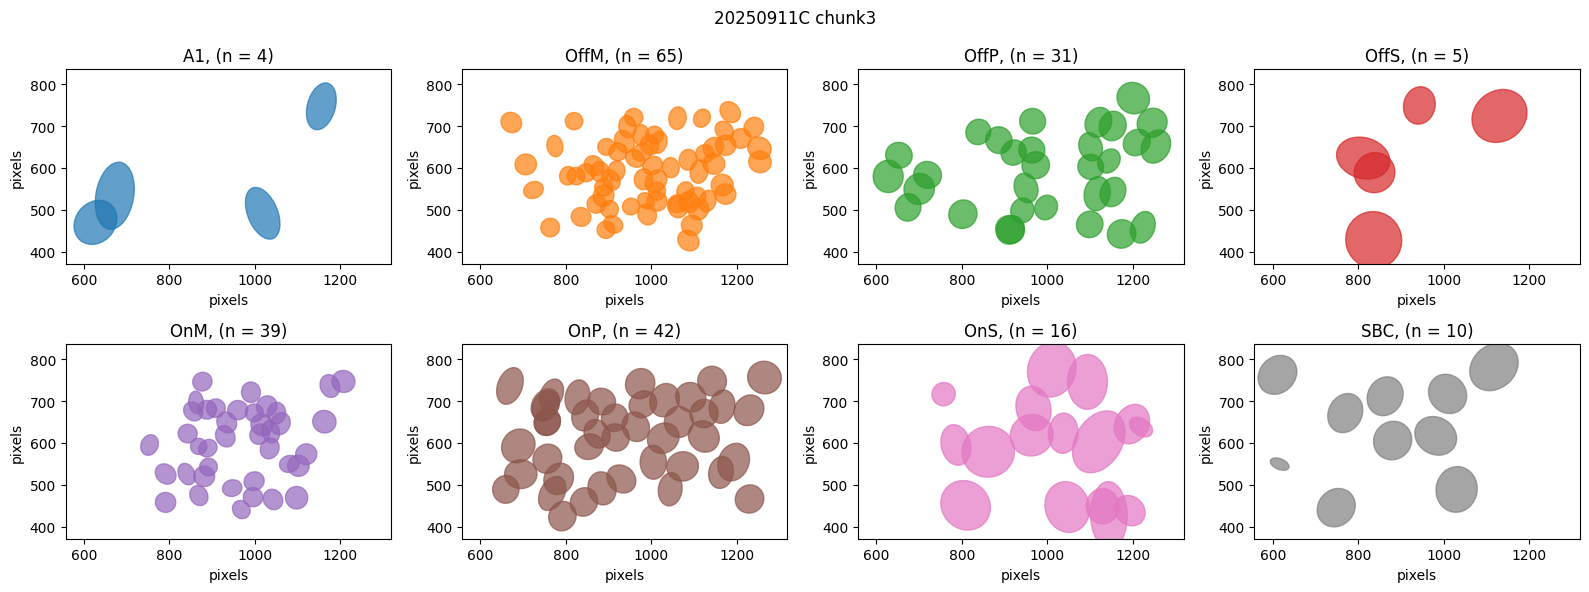

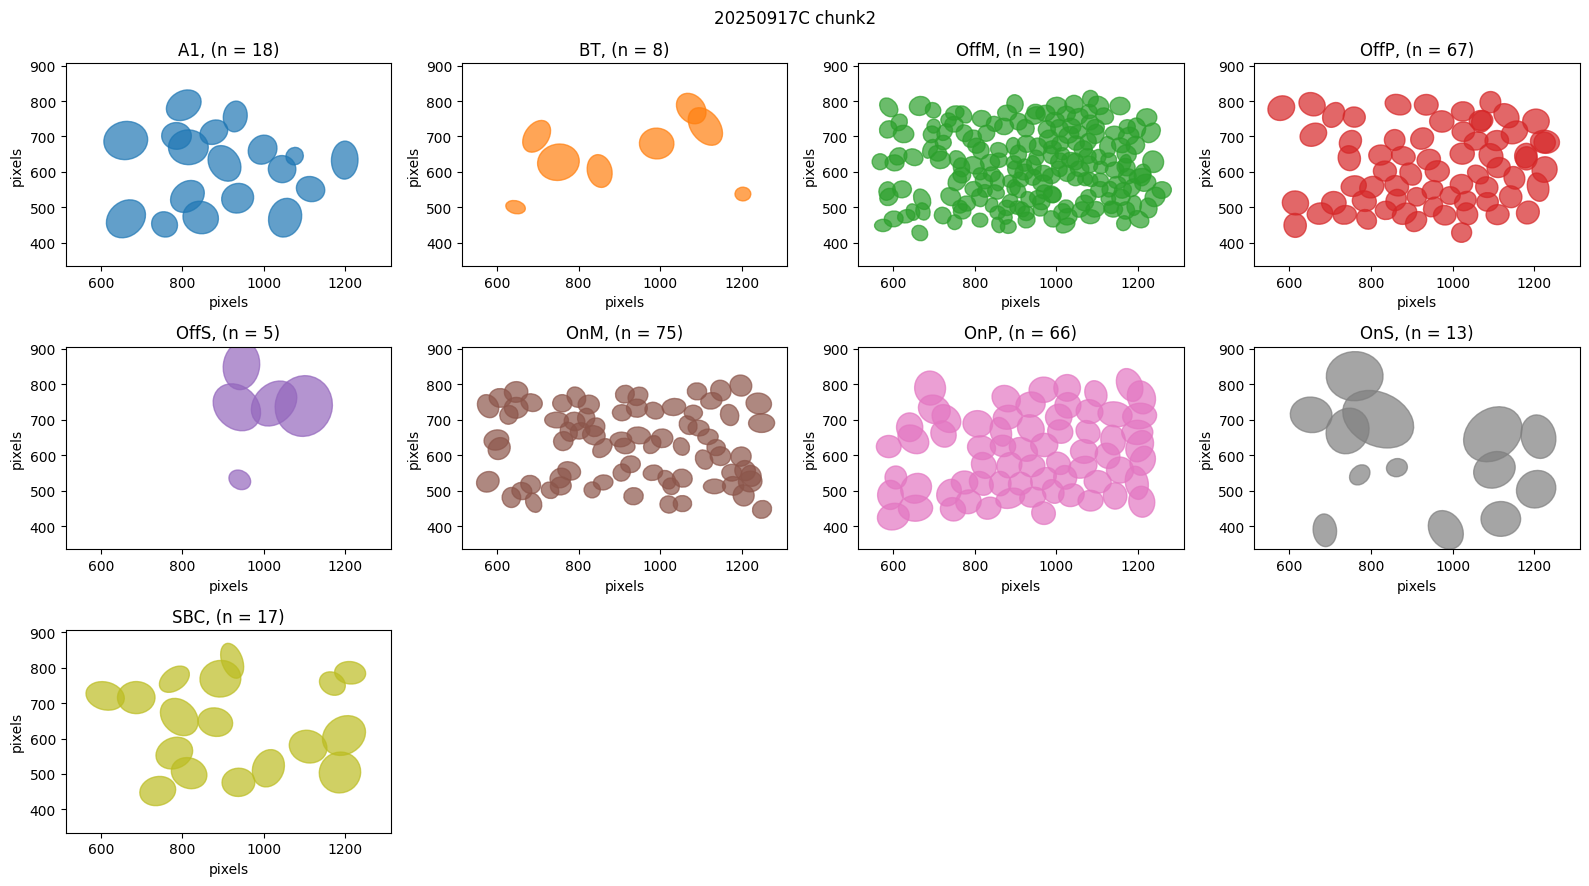

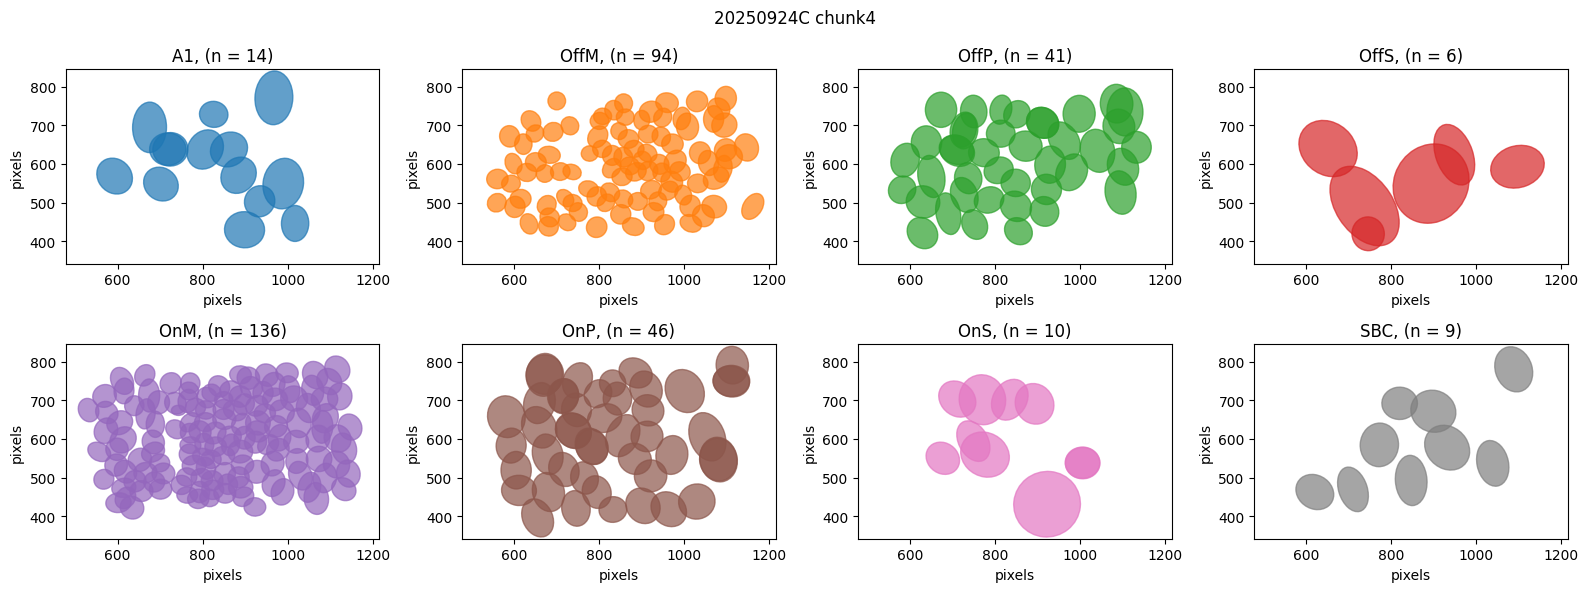

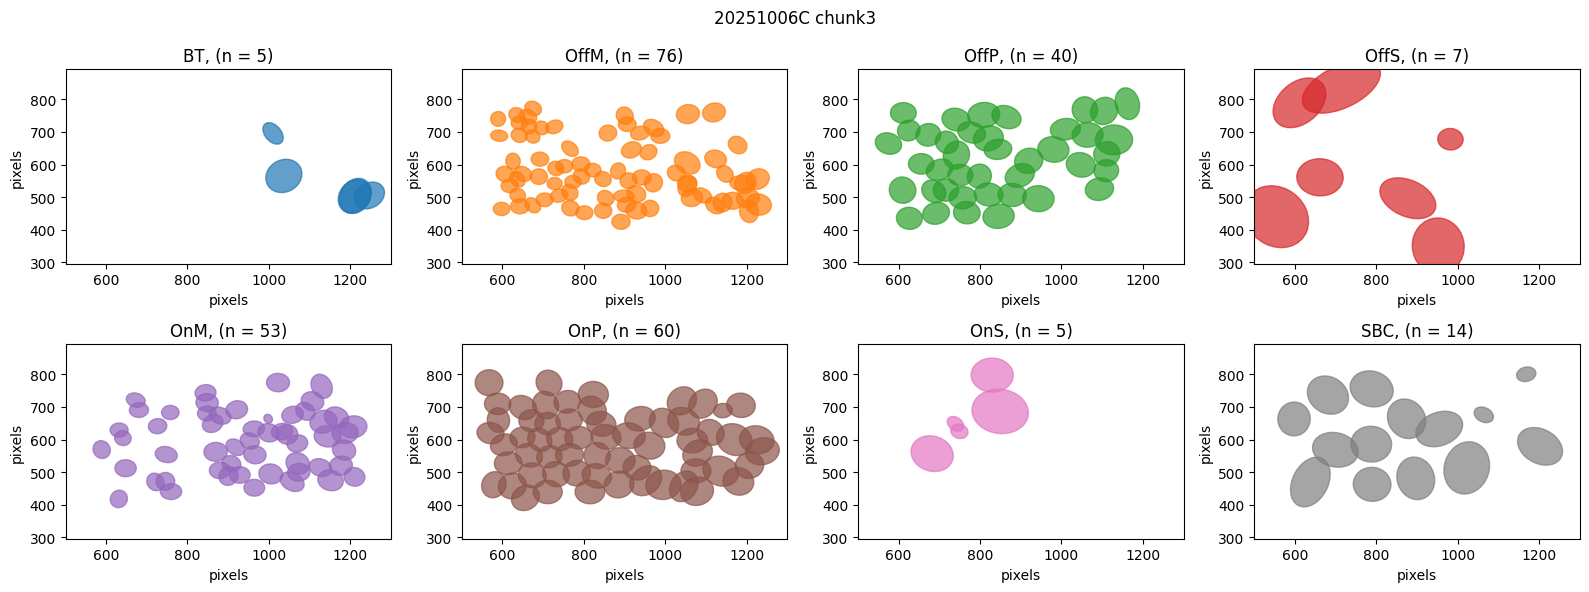

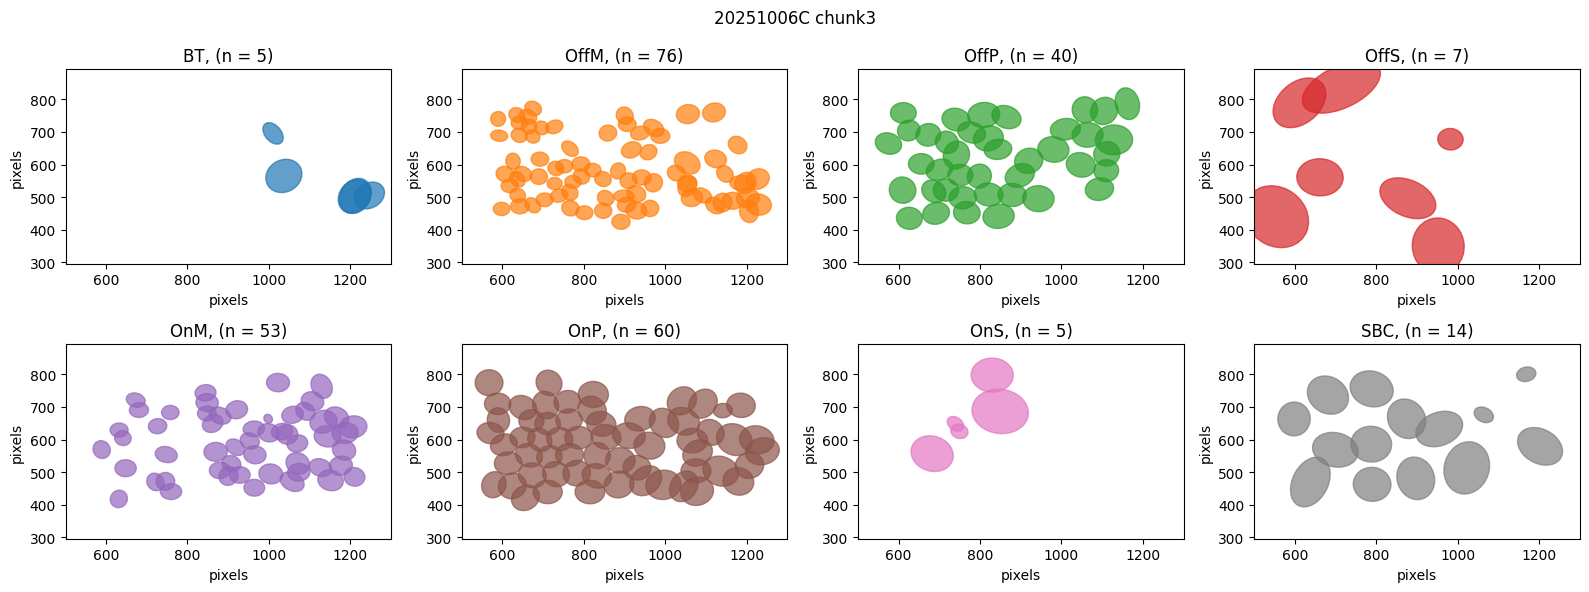

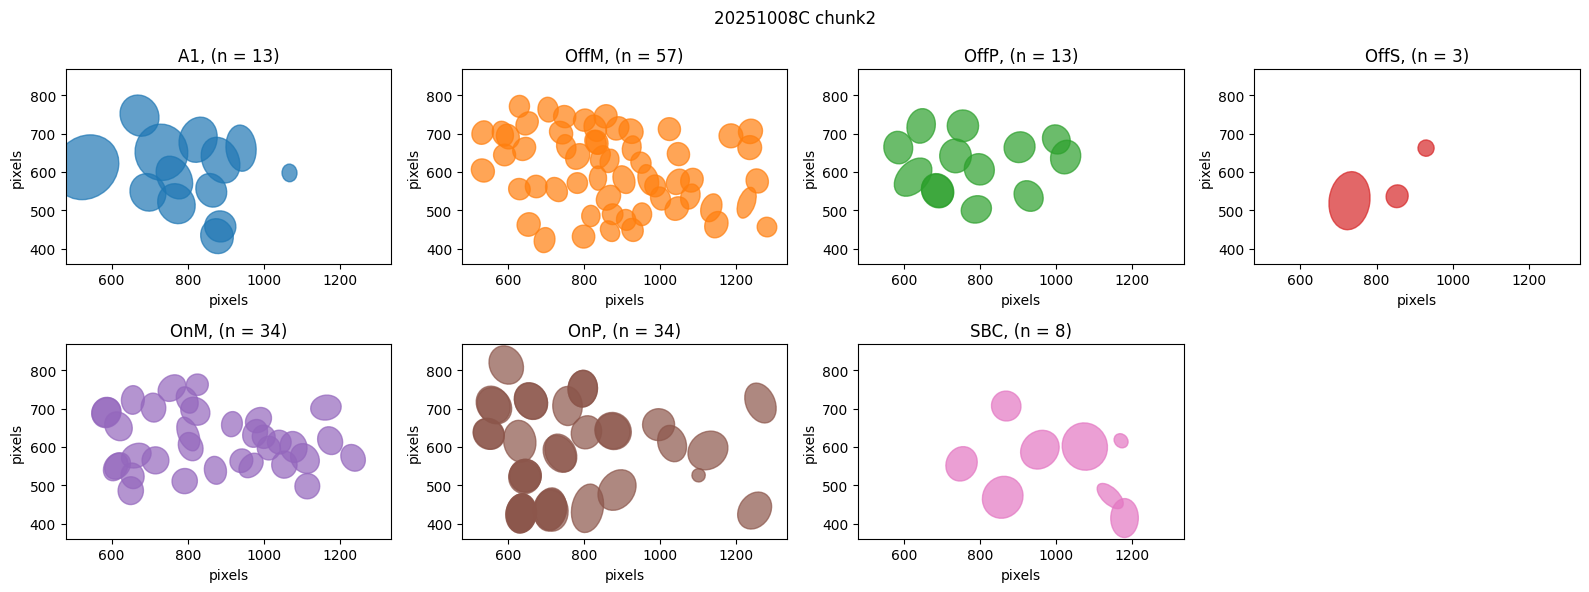

In [19]:
cell_types = ['OnP', 'OffP', 'OnM', 'OffM', 'SBC', 'A1', 'BT', 'OnS', 'OffS']
all_axes = ra.plot_mosaics_for_datasets(exp_search, cell_types,
                                        preferred_typing_file = 'dragos_kilosort2.5.classification.txt',
                                        minimum_n = 3, b_zoom = True)

## Choose an Experiment

In [20]:
exp_name = '20250715C'
datafile_name = exp_search.query('exp_name == @exp_name')['datafile_name'].item()
experiment_summary = ra.get_exp_summary(exp_name)
display(experiment_summary)

,exp_name,prep_label,datafile_name,group_label,NDF,chunk_name,protocol_name,duration_minutes,minutes_since_start,start_time,end_time,data_dir,experiment_id,prep_id,group_id,block_id,chunk_id,protocol_id
0,20250715C,Mount1,data000,CRF,0.5,chunk1,manookinlab.protocols.ContrastResponseGrating,1.22,1.22,2025-07-15 12:16:21,2025-07-15 12:17:34,20250715C\data000,130,149,2338,3371,516,1
1,20250715C,Mount1,data001,noise,0.5,chunk1,manookinlab.protocols.SpatialNoise,12.55,14.33,2025-07-15 12:18:08,2025-07-15 12:30:41,20250715C\data001,130,149,2339,3372,516,19
2,20250715C,Mount1,data002,noise,0.5,chunk1,manookinlab.protocols.SpatialNoise,49.42,69.10,2025-07-15 12:36:02,2025-07-15 13:25:27,20250715C\data002,130,149,2339,3373,516,19
3,20250715C,Mount1,data003,moving letters,0.5,letters1,edu.washington.riekelab.protocols.MovingLetters,56.98,128.03,2025-07-15 13:27:24,2025-07-15 14:24:23,20250715C\data003,130,149,2340,3374,521,67
4,20250715C,Mount1,data004,VR LED sawtooth,4.0,letters1,edu.washington.riekelab.vyom.protocols.LedSawt...,18.75,152.38,2025-07-15 14:29:59,2025-07-15 14:48:44,20250715C\data004,130,149,2341,3375,521,65
5,20250715C,Mount1,data005,VR 118 CRF Grid,1.0,letters1,edu.washington.riekelab.vyom.protocols.Contras...,12.02,169.97,2025-07-15 14:54:18,2025-07-15 15:06:19,20250715C\data005,130,149,2342,3376,521,66
6,20250715C,Mount1,data006,VR 354 CRF Grid,1.0,letters1,edu.washington.riekelab.vyom.protocols.Contras...,10.95,182.28,2025-07-15 15:07:41,2025-07-15 15:18:38,20250715C\data006,130,149,2343,3377,521,66
7,20250715C,Mount1,data007,noise,0.5,chunk2,manookinlab.protocols.SpatialNoise,61.83,251.27,2025-07-15 15:25:47,2025-07-15 16:27:37,20250715C\data007,130,149,2344,3378,517,19
8,20250715C,Mount1,data008,DLR Defocus No Gap Half Run,0.5,defocus,edu.washington.riekelab.protocols.PresentMatFiles,17.22,273.13,2025-07-15 16:32:16,2025-07-15 16:49:29,20250715C\data008,130,149,2345,3379,519,68
9,20250715C,Mount1,data009,DLR Defocus Default,0.5,defocus,edu.washington.riekelab.protocols.PresentMatFiles,42.02,316.42,2025-07-15 16:50:45,2025-07-15 17:32:46,20250715C\data009,130,149,2346,3380,519,68


## Initialize Analysis Pipeline

In [21]:
pipeline = ra.create_mea_pipeline(exp_name, datafile_name, typing_file = 'dragos_kilosort2.5.classification.txt')

Initializing StimBlock for 20250715C block 3387
Nearest noise chunk for data016 is chunk3 with distance 127 minutes.

Initializing ResponseBlock for 20250715C block 3387
Loading frame monitor data from E:\mea_ssd\data\h5\20250715C.h5 ...
Loaded (12, 30500) frame_data.

Loading VCD from E:\mea_ssd\data\sorted\20250715C\data016\kilosort2.5 ...
VCD loaded with 786 cells.

Using chunk3 for AnalysisChunk

Loading VCD from E:\mea_ssd\analysis\20250715C\chunk3\kilosort2.5 ...
VCD loaded with 661 cells.

Loaded spatial maps for channels [0, 2] and 661 cells of shape (126, 202, 2)
Spatial maps have been padded to align with RF parameters.

Cluster matching 20250715C chunk3 with ObjectMotionDots ...
66.87% matched, 33.13% unmatched.

Using dragos_kilosort2.5.classification.txt for classification.



## Plot Noise RFs and Cluster Matched RFs to Compare

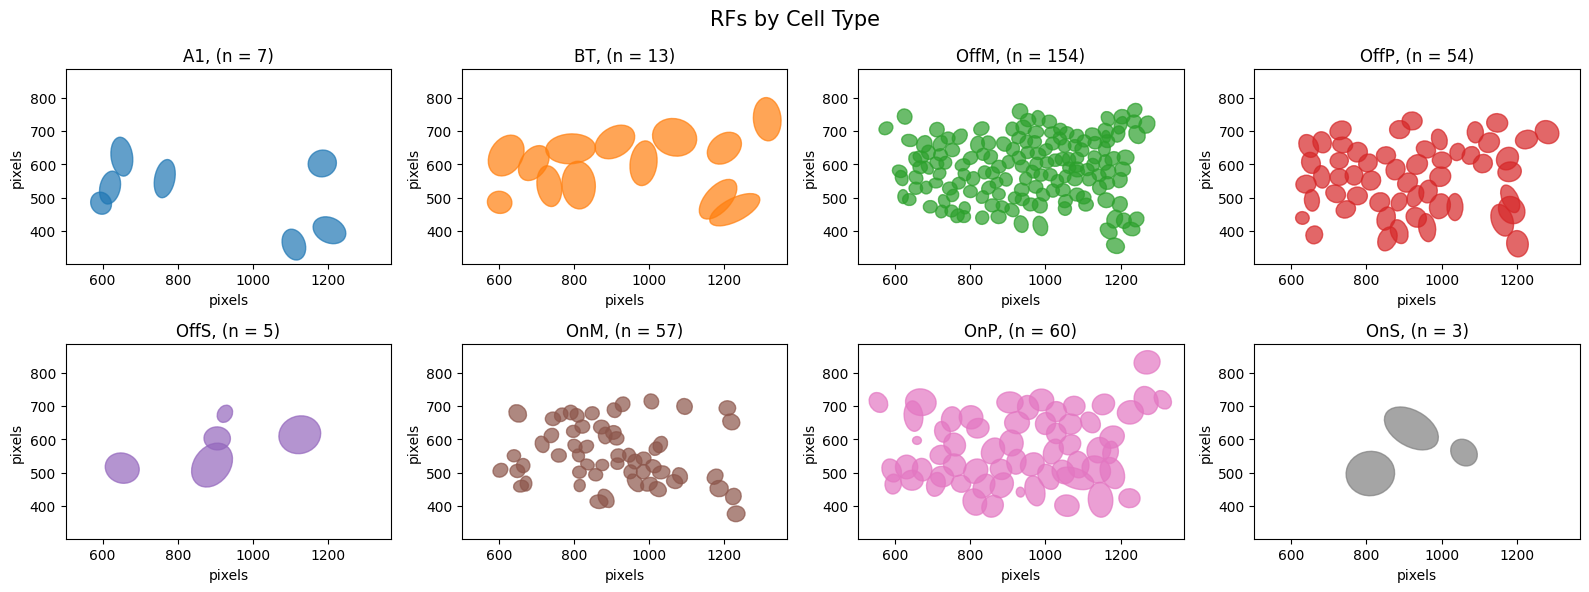

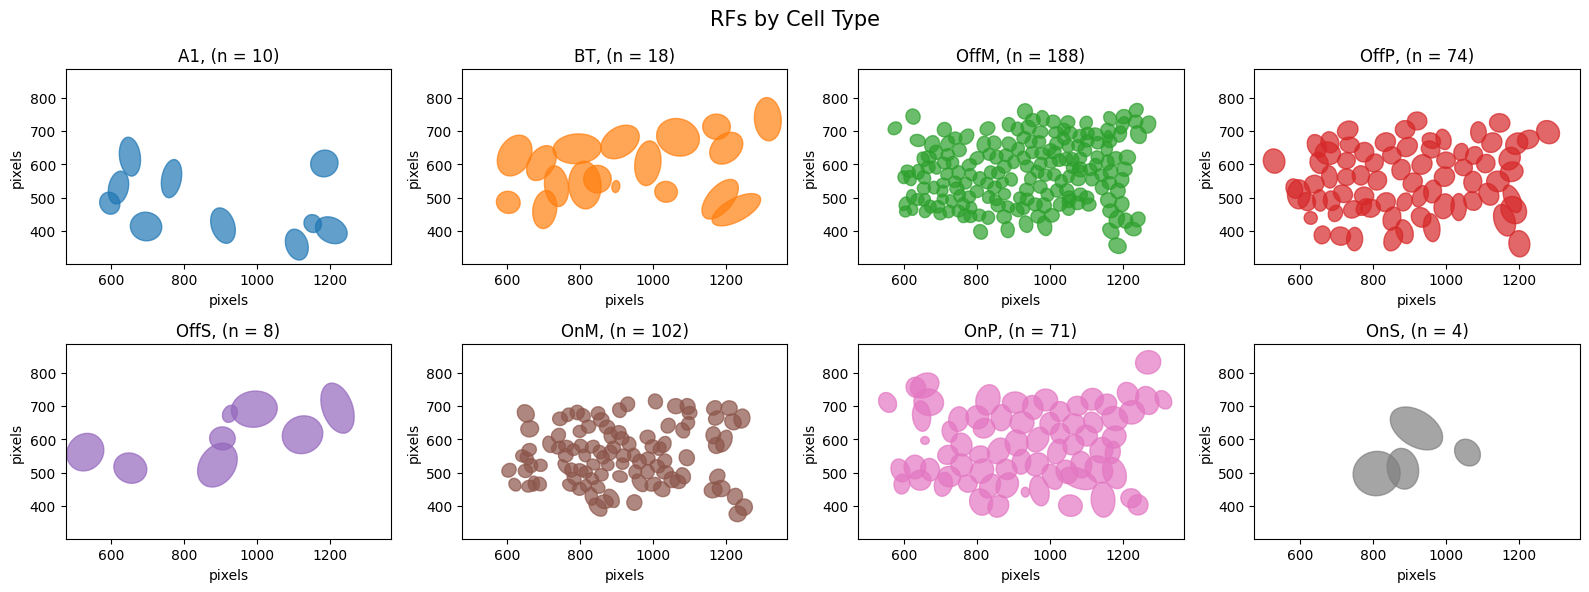

In [22]:
protocol_rfs = pipeline.plot_rfs(cell_types = cell_types, minimum_n = 3, b_zoom = True)
noise_rfs = pipeline.analysis_chunk.plot_rfs(cell_types = cell_types, minimum_n = 3, b_zoom = True,
                                             typing_file = 'dragos_kilosort2.5.classification.txt')

## Break Out Underlying Objects

In [23]:
stim_block = pipeline.stim_block
response_block = pipeline.response_block
analysis_chunk = pipeline.analysis_chunk

## Show Stim Information

In [ ]:
stimulus_data = stim_block.df_epochs
display(stimulus_data)

# Pull epoch block params and space constants into their own variables
epoch_block_params = stim_block.d_epoch_block_params
all_space_constants = epoch_block_params['spaceConstants']
space_constant = stimulus_data['spaceConstant'].values

,epoch_index,spaceConstant,seed,exp_name,datafile_name,group_label,protocol_name,frame_times_ms,epoch_parameters,data_dir,preTime,stimTime,tailTime,experiment_id,group_id,block_id,protocol_id,epoch_id
0,0,50.0,1.080758e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,247995
1,1,100.0,1.080763e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,247996
2,2,200.0,1.080768e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,247997
3,3,300.0,1.080773e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,247998
4,4,400.0,1.080778e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,247999
5,5,500.0,1.080783e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,248000
6,6,750.0,1.080788e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,248001
7,7,1000.0,1.080793e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,248002
8,8,50.0,1.080798e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,248003
9,9,100.0,1.080803e+09,20250715C,data016,OMS Dots 12 of 16,manookinlab.protocols.ObjectMotionDots,"[0.0, 17.0, 33.0, 50.0, 67.0, 83.0, 100.0, 117...","{'NDF': 0.5, 'amp': 'Amp1', 'amp2': '(None)', ...",20250715C\data016,250.0,30000.0,250.0,130,2353,3387,12,248004


## Pull Spike Times and Spike Counts

In [ ]:
spike_times = ra.get_spike_xarr(response_block, cell_types = cell_types, minimum_n = 3)
spike_counts = xr.apply_ufunc(len, spike_times, vectorize = True)

# Bonus: Use apply_ufunc to pull the average baseline spike count from the 'pre time' portion of the stimulus
def get_avg_baseline(arr, pre_time):
    pre_spikes = [spike for spike in arr if spike < pre_time]

    return len(pre_spikes)

pre_time = epoch_block_params['preTime']
baseline_spike_counts = xr.apply_ufunc(get_avg_baseline, spike_times, 
                                       kwargs = {'pre_time' : pre_time},
                                       vectorize = True)


## Plot Some Results

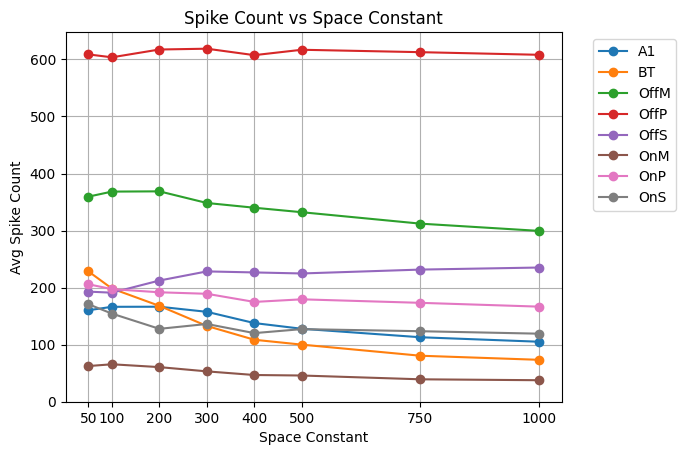

In [ ]:
cell_types = sorted(np.unique(spike_times.coords['cell_type'].values))

fig, ax  = plt.subplots()

for ct_idx, ct in enumerate(sorted(cell_types)):
    ct_xarr = spike_counts.where(spike_counts.cell_type == ct, drop = True)
    ct_baseline = baseline_spike_counts.where(baseline_spike_counts.cell_type == ct, drop = True)
    baseline_mean = ct_baseline.mean(dim = ['cell_id', 'epoch'], skipna = True).item()
    ct_means = []
    ct_stds = []
    for idx, constant in enumerate(all_space_constants):
        constant_xarr = ct_xarr.sel(epoch = ct_xarr.epoch[space_constant == constant])
        constant_mean = constant_xarr.mean(dim = ['cell_id', 'epoch'], skipna = True)
        constant_std = constant_xarr.std(dim = ['cell_id', 'epoch'], skipna = True)

        ct_means.append(constant_mean-baseline_mean)
        ct_stds.append(constant_std)
    ct_means = np.array(ct_means)
    ct_stds = np.array(ct_stds)

    ax .plot(all_space_constants, ct_means, color = f'C{ct_idx}', label = ct, marker = 'o', )
    # ax2.fill_between(all_space_constants, ct_means-ct_stds, ct_means+ct_stds, color = f'C{ct_idx}', alpha = 0.4)
    # ax2.errorbar(all_space_constants, ct_means, ct_stds, color = f'C{ct_idx}', label = ct, marker = 'o', capsize = 2)

    ax .legend(bbox_to_anchor = [1.05,1], loc = 'upper left')
    ax .set_title('Spike Count vs Space Constant')
    ax .set_xticks(all_space_constants)
    ax .grid(True)
    ax .set_xlabel('Space Constant')
    ax .set_ylabel('Avg Spike Count')

ax .set_ylim(bottom = 0);